In [386]:
import pandas as pd
import numpy as np
import math
import xgboost as xgb
import datetime as dt

titanic = pd.read_csv('titanic1-200803-092333.csv')
df = pd.DataFrame(titanic)

In [387]:
titanic['Survived'].value_counts()
#titanic['Survived'].unique()

0    549
1    342
Name: Survived, dtype: int64

In [388]:
def nan_ratio(series):
    return titanic[series].isna().sum() * 100 / len(series) 

In [389]:
#nan_ratio('Age')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [390]:
titanic['Sex'] = titanic['Sex'].map(lambda x: 1 if x == 'male' else x)
titanic['Sex'] = titanic['Sex'].map(lambda x: 2 if x == 'female' else x)
titanic['Embarked'] = titanic['Embarked'].map(lambda x: 1 if x == 'S' else x)
titanic['Embarked'] = titanic['Embarked'].map(lambda x: 2 if x == 'C' else x)
titanic['Embarked'] = titanic['Embarked'].map(lambda x: 3 if x == 'Q' else x)
#titanic['Adult'] = titanic['Age'].map(lambda x: 0 if x == np.nan else x)
#titanic['Adult'] = titanic['Adult'].map(lambda x: 2 if x <= 17 else x)
#titanic['Adult'] = titanic['Adult'].map(lambda x: 1 if x > 17 else x)
#titanic['1stclass'] = titanic['Pclass']#.map(lambda x: 1 if x == 1 else 0)


In [391]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,3.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,NaN,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,NaN,2.0


In [392]:
#titanic['Survived'].sum()

In [393]:
#np.shape(titanic)

In [408]:
features = [
    'PassengerId',
    #'Survived',
    'Pclass',
    #'Name',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    #'Ticket',
    #'Fare',
    #'Cabin',
    'Embarked',
    #'1stclass',
]        

In [409]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
X = titanic[features].values
Y = titanic['Survived'].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [411]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [412]:
from sklearn.metrics import precision_recall_curve, precision_score, accuracy_score,auc
y_hat = model.predict(X_test)
precision_score(y_test,y_hat), accuracy_score(y_test,y_hat)

(0.7142857142857143, 0.7757847533632287)

<BarContainer object of 7 artists>

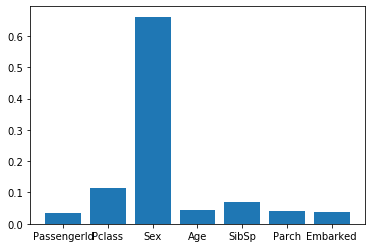

In [413]:
plt.bar(features, model.feature_importances_)